In [171]:
import numpy as np
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import data_visualization as dv
from pathlib import Path
import pandas as pd    
import read_data_functions as rdf
import plot_functions as pf
from initializer import InitialThangs
import Statistics as st
import constants
import pingouin as pg
from scipy import stats
import matplotlib.image as mpimg
from PIL import Image
# import viper as vp
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
EXPERIMENT = "Exp1"
plt.style.use('C:/Users/Seth Sullivan/anaconda3/Lib/site-packages/matplotlib/mpl-data/stylelib/cashaback_light.mplstyle')
plt.rcParams["font.family"] = "DejaVu Sans"
wheel = dv.ColorWheel()

# Get path and save path 
DATA_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results")
SAVE_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\paper\figures")
it = InitialThangs(EXPERIMENT)

# Data

In [173]:
# if "group" not in locals():
#     group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials", movement_metric_type='position')
# else:
#     if group.exp_info.experiment != EXPERIMENT:  # This means i changed experiment and need to run again
#         group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")

# if "group2" not in locals():
#     group2 = rdf.generate_subject_object_v3("Exp2", "All Trials", movement_metric_type='position')
# else:
#     if group2.exp_info.experiment != "Exp2":  # This means i changed experiment and need to run again
#         group2 = rdf.generate_subject_object_v3("Exp2", "All Trials")

with open(constants.MODEL_INPUT_PATH / 'bootstrap_parameter_distribution.pkl','rb') as f:
    parameter_distribution = dill.load(f)    
#* Comparison Targets load
with open(constants.MODEL_INPUT_PATH / 'participant_median_movement_onset_time.pkl','rb') as f:
    participant_median_movement_onset_time = dill.load(f)
with open(constants.MODEL_INPUT_PATH / 'participant_sd_movement_onset_time.pkl','rb') as f:
    participant_sd_movement_onset_time = dill.load(f)
with open(constants.MODEL_INPUT_PATH / 'participant_wins.pkl','rb') as f:
    participant_wins = dill.load(f)  
participant_perc_wins = (participant_wins/it.num_trials)*100
with open(constants.MODEL_INPUT_PATH / 'participant_incorrects.pkl','rb') as f:
    participant_incorrects = dill.load(f)  
participant_perc_incorrects = (participant_incorrects/it.num_trials)*100

with open(constants.MODEL_INPUT_PATH / 'participant_indecisions.pkl','rb') as f:
    participant_indecisions = dill.load(f)  
participant_perc_indecisions = (participant_indecisions/it.num_trials)*100

with open(r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\participant_data\Exp1_stats_df.pkl', "rb") as f:
    df = dill.load(f)
    

In [174]:
df

,Subject,Condition,Factor_1,Factor_2,Median_Movement_Onset_Time,Median_Movement_Time,Wins,Indecisions,Incorrects,Correct_Decisions,Wins_When_Both_Decide,Median_Gamble_Movement_Onset_Time,SD_Movement_Onset_Time,Q1_Movement_Onset_Time,Q3_Movement_onset_time,Reaction_Decisions,Gamble_Decisions,Points
0,1,1,1000,50,1149.5,183.0,58.75,3.75,37.50,48.75,61.038961,1259.0,92.573814,1071.75,1196.00,26.25,73.75,0.0
1,1,2,1000,150,1166.5,202.0,70.00,17.50,12.50,60.00,84.615385,1188.5,101.211547,1063.50,1219.00,42.50,57.50,0.0
2,1,3,1100,50,1215.0,195.0,53.75,16.25,30.00,63.75,64.179104,1315.0,154.859838,1099.25,1289.50,33.75,66.25,0.0
3,1,4,1100,150,1120.0,188.0,53.75,5.00,41.25,51.25,53.521127,1129.0,122.806199,1057.25,1184.25,12.50,87.50,0.0
4,1,5,1200,50,1112.5,194.0,42.50,3.75,53.75,45.00,44.155844,NaN,135.230997,1017.75,1192.00,0.00,100.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,20,2,1000,150,912.5,277.0,50.00,8.75,41.25,51.25,54.166667,1115.0,206.828841,796.75,1041.00,11.25,88.75,0.0
116,20,3,1100,50,1033.5,255.0,47.50,13.75,38.75,56.25,55.072464,1298.0,159.593623,920.50,1155.00,11.25,88.75,0.0
117,20,4,1100,150,1002.5,253.5,51.25,13.75,35.00,55.00,58.823529,1210.0,189.881132,903.75,1168.75,17.50,82.50,0.0
118,20,5,1200,50,1001.0,268.5,43.75,8.75,47.50,48.75,47.945205,1419.5,182.333856,842.25,1094.75,2.50,97.50,0.0


# Stats

In [175]:
#* Get dataframe and create the stats inputs
# TODO LOAD IN THE DATAFRAME FROM The new df I just created

exp1_stats_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_stats_df.pkl") 
exp1_anova_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_anova_df.pkl") 
exp1_pvals_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_pvals_df.pkl") 
exp1_pvals_uncorrected_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_pvals_uncorrected_df.pkl") 
exp1_cles_df  = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_cles_df.pkl") 

exp2_stats_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_stats_df.pkl") 
exp2_anova_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_anova_df.pkl") 
exp2_pvals_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_pvals_df.pkl") 
exp2_cles_df  = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_cles_df.pkl") 
exp2_pvals_df

,Metric,Collapsed,01,02,13,23
0,Reaction_Time_Median,NaN,0.0,0.022598,0.0,0.036986
1,Reaction_Time_SD,react_guess,0.0,NaN,NaN,NaN
2,Reaction_Time_IQR,NaN,0.0,0.000006,0.0,0.000000


In [176]:
exp1_anova_df

,Metric,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Median_Movement_Onset_Time,Factor_1,59699.487500,2,38,29849.743750,4.360600,1.972979e-02,3.007528e-02,0.031095,0.775649
1,Median_Movement_Onset_Time,Factor_2,66811.602083,1,19,66811.602083,6.815716,1.718830e-02,1.718830e-02,0.034671,1.000000
2,Median_Movement_Onset_Time,Factor_1 * Factor_2,2723.429167,2,38,1361.714583,0.521157,5.980163e-01,5.652153e-01,0.001462,0.828255
0,SD_Movement_Onset_Time,Factor_1,15203.650706,2,38,7601.825353,5.501936,7.970963e-03,1.801482e-02,0.041648,0.691673
1,SD_Movement_Onset_Time,Factor_2,10047.983589,1,19,10047.983589,20.361034,2.384257e-04,2.384257e-04,0.027919,1.000000
2,SD_Movement_Onset_Time,Factor_1 * Factor_2,3851.588749,2,38,1925.794374,2.485900,9.669434e-02,9.740084e-02,0.010889,0.988805
0,Wins,Factor_1,13373.671875,2,38,6686.835938,51.777019,1.407231e-11,2.670757e-09,0.501585,0.759118
1,Wins,Factor_2,579.700521,1,19,579.700521,8.951407,7.495068e-03,7.495068e-03,0.041799,1.000000
2,Wins,Factor_1 * Factor_2,2636.119792,2,38,1318.059896,23.729079,2.053863e-07,3.546155e-06,0.165531,0.770944
0,Incorrects,Factor_1,5953.854167,2,38,2976.927083,29.795407,1.648612e-08,1.588739e-07,0.246655,0.847537


# General Figures

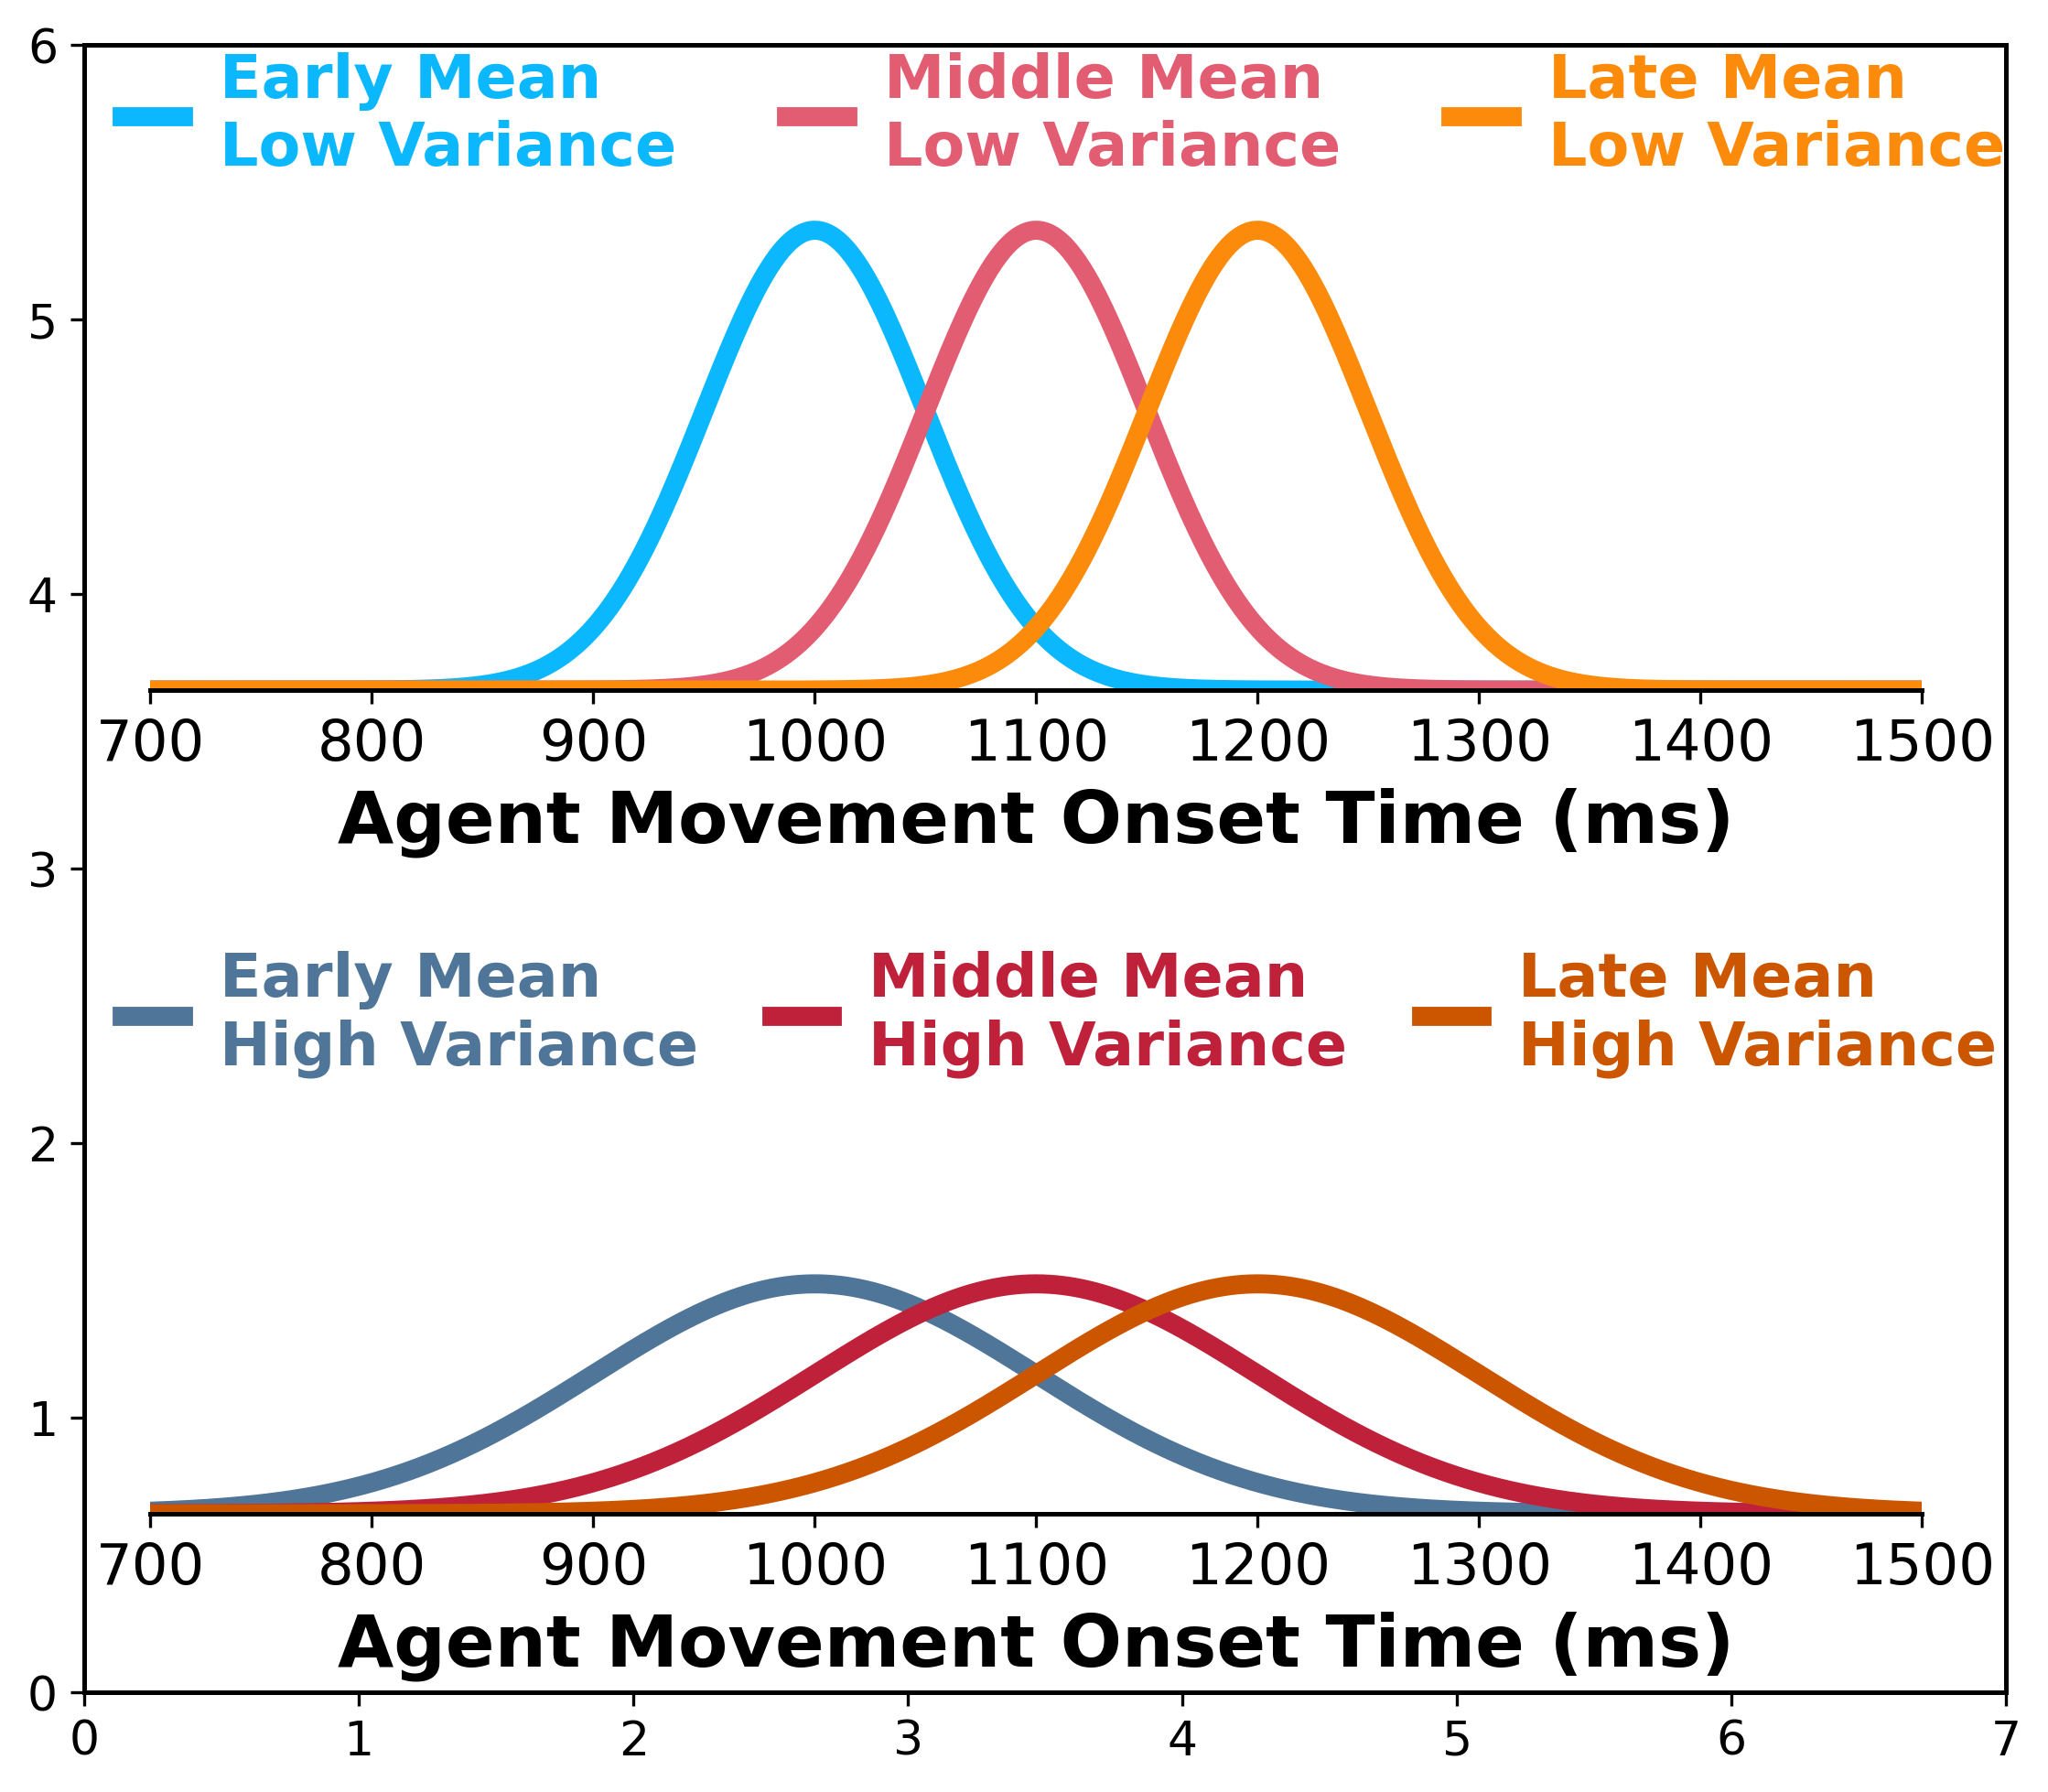

In [177]:
#
#* Plot Parameters
timesteps = np.arange(0,2000,1)
mu1,mu2,mu3 = 1000,1100,1200
sd1,sd2 = 50,100

dist1 = stats.norm.pdf(timesteps,mu1,sd1) 
dist2 = stats.norm.pdf(timesteps,mu2,sd1) 
dist3 = stats.norm.pdf(timesteps,mu3,sd1) 
dist4 = stats.norm.pdf(timesteps,mu1,sd2) 
dist5 = stats.norm.pdf(timesteps,mu2,sd2) 
dist6 = stats.norm.pdf(timesteps,mu3,sd2)
dists1 = [dist1, dist2, dist3]
dists2 = [dist4, dist5, dist6]
alldists = [dists1,dists2]

legend_labels1 = [
    "Early Mean\nLow Variance",
    "Middle Mean\nLow Variance",
    "Late Mean\nLow Variance",
]

legend_labels2 = [
    "Early Mean\nHigh Variance",
    "Middle Mean\nHigh Variance",
    "Late Mean\nHigh Variance",
]
legend_labels = [legend_labels1, legend_labels2]
legend_locs = [(-0.03,0.77),(-0.03,0.65)]
columnspacing = [1.8,1.2] 
titles = ["Low Uncertainty", "High Uncertainty"]
#* All Plots
fig = pf.NewFigure("a;b", figsize=(7,6),dpi= 300)
ax1 = fig.axes['a']
ax2 = fig.axes['b']
colors = [constants.xticklabel_colors_means[:3], constants.xticklabel_colors_means[3:]] 
for i,ax in enumerate(fig.axes.values()):
    for j in range(3):
        ax.plot(alldists[i][j],color=colors[i][j],lw=5)
        
    ax.set_xlim(700,1500)
    ax.set_xticks(np.arange(700,1501,100))
    ax.set_xticklabels(np.arange(700,1501,100),fontsize=15)
    # ax.set_title(titles[i])
    ax.get_yaxis().set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel('Agent Movement Onset Time (ms)',fontsize = 19)
    ax.set_ylim(0,0.011)

for i,ax in enumerate(fig.axes.values()):
    leg = dv.legend(ax,labels=legend_labels[i], colors=colors[i], ncols=3, loc=legend_locs[i],
    handlelength=1.0, columnspacing=columnspacing[i], lw=5, fontsize=16, fontweight='bold',
    handletextpad=0.6)
    leg.set_in_layout(False)
    
# for i,ax in enumerate(fig.axes.values()):
    # fig.adjust_size(ax,(0.48,0.0))
# fig.adjust_position(ax1,(0,0.1))
plt.show()
fig.savefig(SAVE_PATH / 'exp_design_distributions.png')

## Experimental Design

(-0.5, 655.5, 515.5, -0.5)

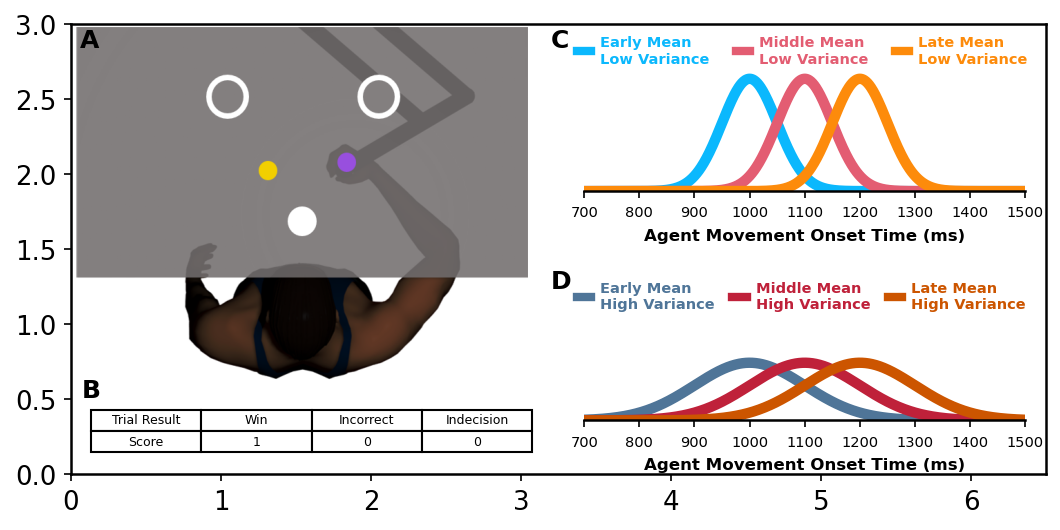

In [178]:
timesteps = np.arange(0,2000,1)
mu1,mu2,mu3 = 1000,1100,1200
sd1,sd2 = 50,100

dist1 = stats.norm.pdf(timesteps,mu1,sd1) 
dist2 = stats.norm.pdf(timesteps,mu2,sd1) 
dist3 = stats.norm.pdf(timesteps,mu3,sd1) 
dist4 = stats.norm.pdf(timesteps,mu1,sd2) 
dist5 = stats.norm.pdf(timesteps,mu2,sd2) 
dist6 = stats.norm.pdf(timesteps,mu3,sd2)
dists1 = [dist1, dist2, dist3]
dists2 = [dist4, dist5, dist6]
alldists = [dists1,dists2]

legend_labels1 = [
    "Early Mean\nLow Variance",
    "Middle Mean\nLow Variance",
    "Late Mean\nLow Variance",
]

legend_labels2 = [
    "Early Mean\nHigh Variance",
    "Middle Mean\nHigh Variance",
    "Late Mean\nHigh Variance",
]
legend_labels = [legend_labels1, legend_labels2]
legend_locs = [(-0.03,0.77),(-0.03,0.65)]
columnspacing = [1.8,1.2] 
#* All Plots
fig = pf.NewFigure('ab;ab;ad;cd', figsize=(6.5,3), hspace=0,wspace=0)
# Kinarm Guy
fig.axes['a'].imshow(mpimg.imread(SAVE_PATH / "kinarm_guy.png"), aspect='equal')

# Table
fig.axes['c'].table(cellText=[['Trial Result', 'Win', "Incorrect", 'Indecision'],
                              ['Score', "1", "0", "0"]
                              ],
                    cellLoc = 'center',
                    bbox=(-0.03,-0.75,1,1),
                    
                    )

# Distribution plots
ax1 = fig.axes['b']
ax2 = fig.axes['d']
colors = [constants.xticklabel_colors_means[:3], constants.xticklabel_colors_means[3:]] 
for i,ax in enumerate([ax1,ax2]):
    for j in range(3):
        ax.plot(alldists[i][j],color=colors[i][j],lw=5)
        
    ax.set_xlim(700,1500)
    ax.set_xticks(np.arange(700,1501,100))
    ax.set_xticklabels(np.arange(700,1501,100),fontsize=7, c='black')
    # ax.set_title(titles[i])
    ax.get_yaxis().set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel('Agent Movement Onset Time (ms)',fontsize = 8)
    ax.set_ylim(0,0.011)

for i,ax in enumerate([ax1,ax2]):
    leg = dv.legend(ax,labels=legend_labels[i], colors=colors[i], ncols=3, loc=legend_locs[i],
    handlelength=1.0, columnspacing=columnspacing[i], lw=4, fontsize=7, fontweight='bold',
    handletextpad=0.6)
    leg.set_in_layout(False)
    
# fig.axes['c'] = 
fig.fig.get_layout_engine().set(w_pad=1/72, 
                                h_pad=1 / 72, 
                                hspace=0,
                                wspace=0)

adjust = 0.75
fig.adjust_size(fig.axes['a'],(adjust,adjust+0.08))
fig.adjust_position(fig.axes['a'],(-adjust+0.22,-adjust+0.115))

fig.add_letter(fig.axes['a'], 
               x=0.01, y=0.99, 
               letter='A')
fig.add_letter(fig.axes['c'], x=-0.05, y=1, letter="B")

fig.add_letter(ax1,x=-0.075,y=1.05)
fig.add_letter(ax2,x=-0.075,y=0.95)

# fig.adjust_position(ax1, (-0.04,-0.04))

fig.axes['c'].axis("off")
fig.axes['a'].axis('off')

# Plotting Constants

In [179]:
collapse_colors = [
    wheel.blend_colors(constants.xticklabel_colors_means[0],constants.xticklabel_colors_means[3]),
    wheel.blend_colors(constants.xticklabel_colors_means[1],constants.xticklabel_colors_means[4]),
    wheel.blend_colors(constants.xticklabel_colors_means[2],constants.xticklabel_colors_means[5])
]

# Data Figures

## Movement Onset and SD 

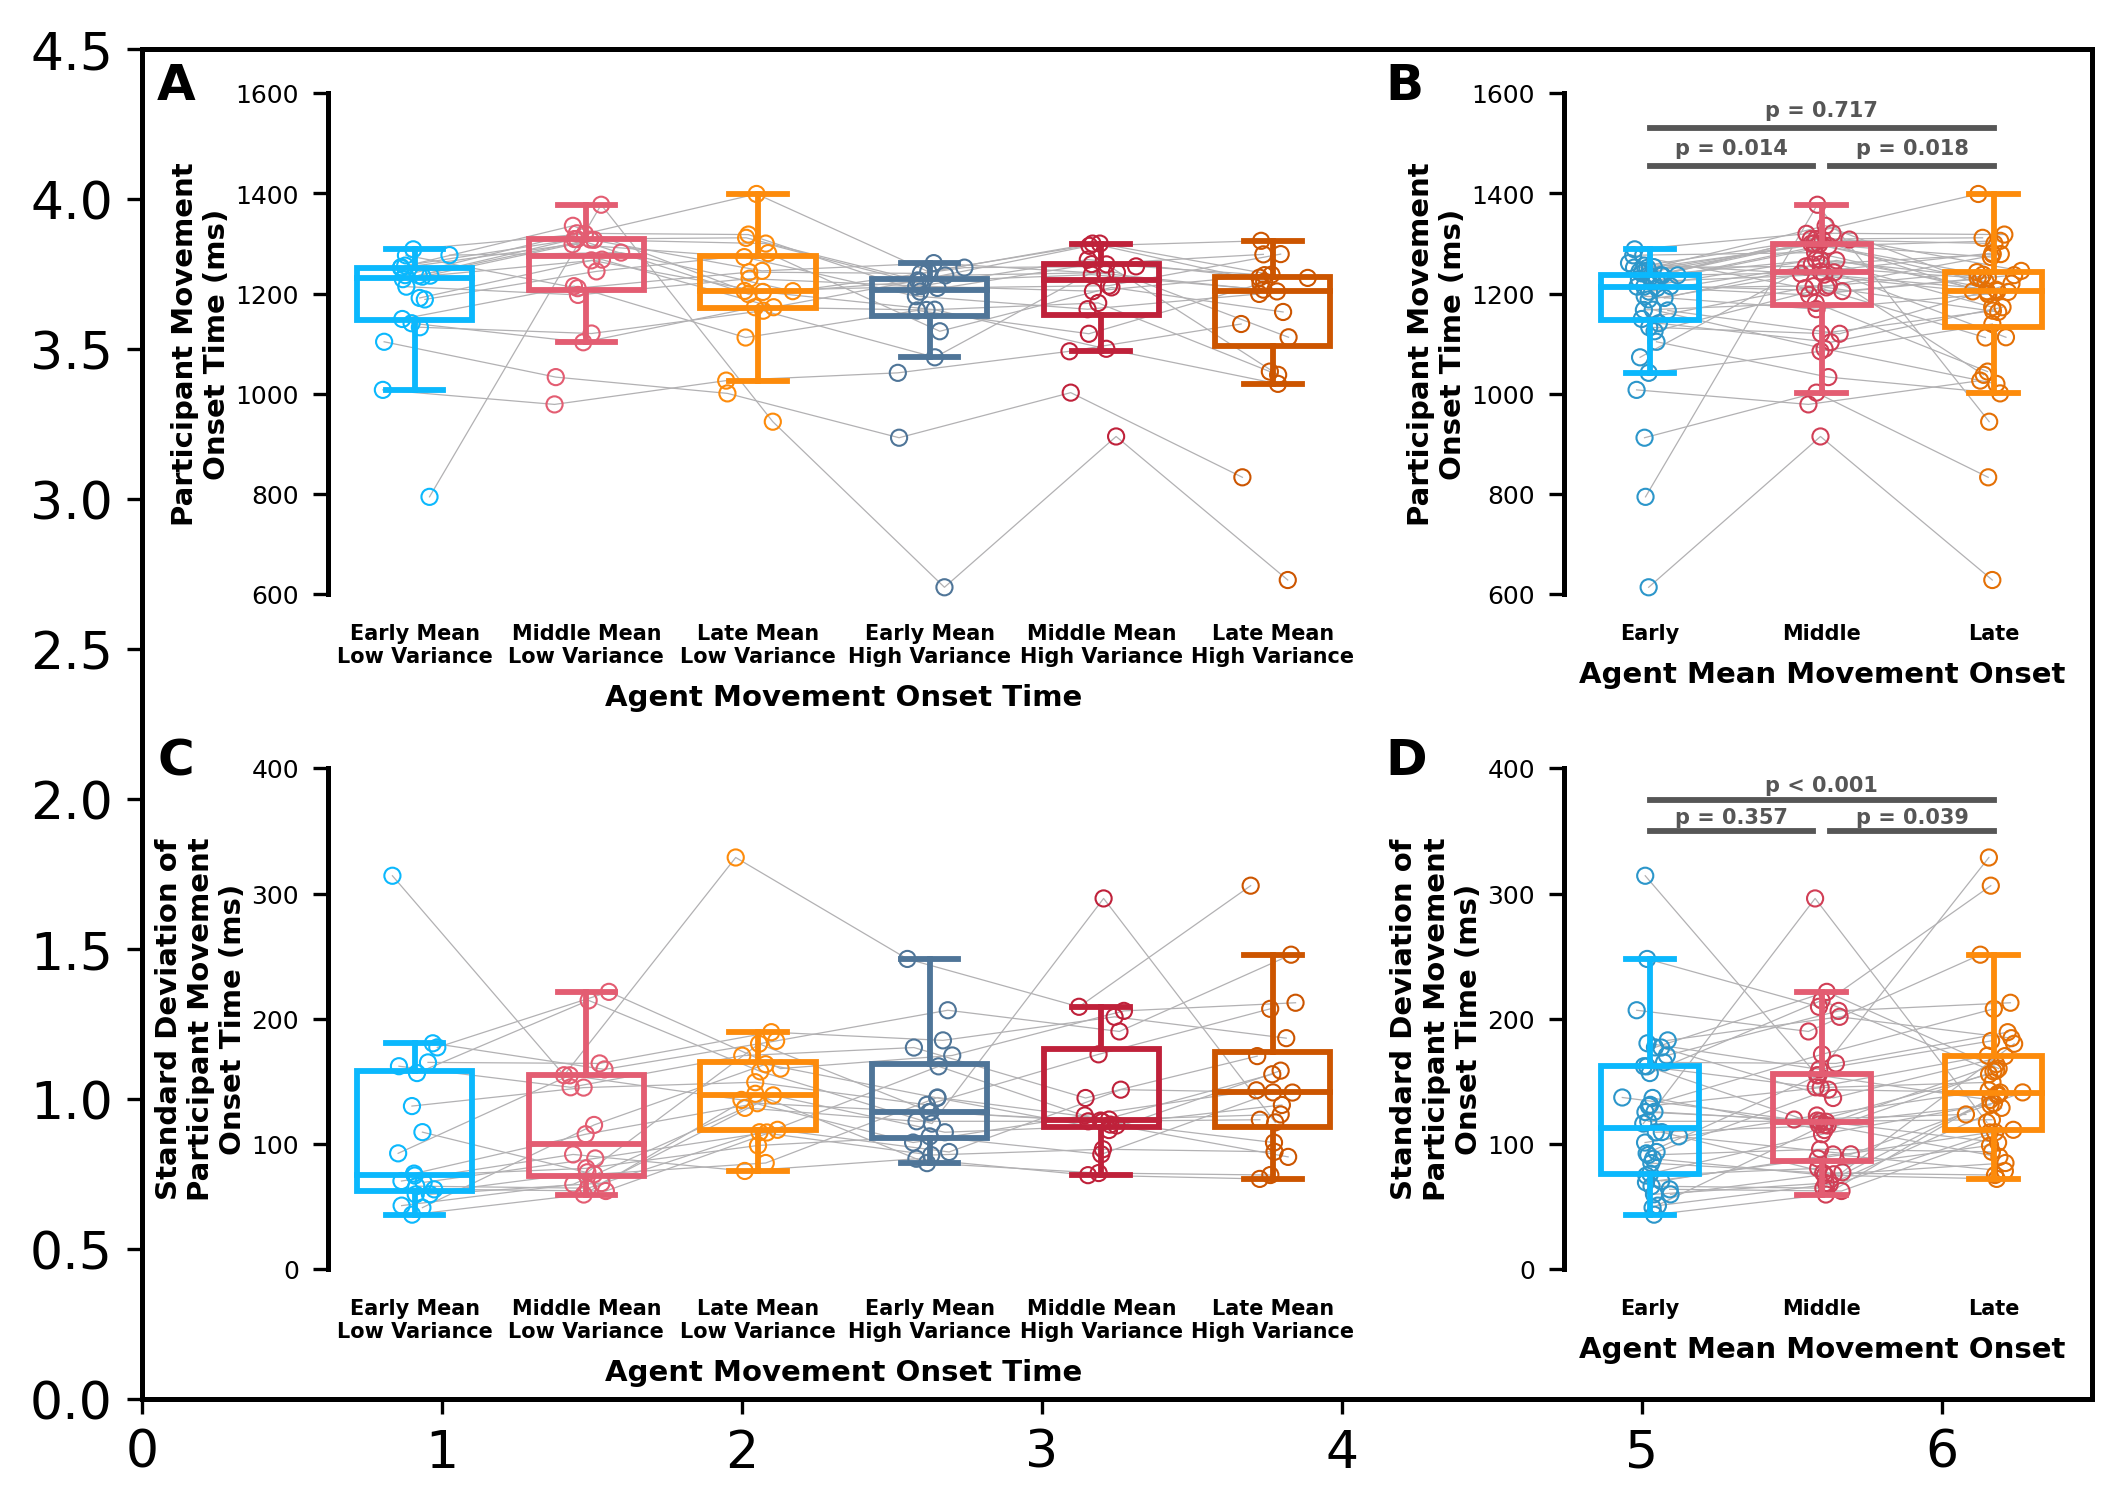

In [180]:

save_path = Path(
    r"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\figures"
)
w, h = 6.5, 4.5
bw = (0.35 * w) / it.num_blocks  # box widths of all boxes combined takes up 30% of the width
div_w = 2.3
xlocs = np.linspace(0, w / div_w, num=len(it.trial_block_titles))
legend_fontsize = 6.5
xticklabel_fontsize = 5
yticklabel_fontsize = 6
suptitle_fontsize = 6
label_fontsize = 7
markersize = 15

ylabelpads = [1,1,5,]
normal_metrics = np.array([participant_median_movement_onset_time, 
                           participant_sd_movement_onset_time,])
metrics = normal_metrics[:, :, [0, 2, 4, 1, 3, 5]]  # Rearranging axes to get the order I want

collapsed_metrics1 = np.array((
    np.hstack((normal_metrics[0,:,0],normal_metrics[0,:,1])),
    np.hstack((normal_metrics[0,:,2],normal_metrics[0,:,3])),
    np.hstack((normal_metrics[0,:,4],normal_metrics[0,:,5])),
))  
collapsed_metrics2 = np.array((
    np.hstack((normal_metrics[1,:,0],normal_metrics[1,:,1])),
    np.hstack((normal_metrics[1,:,2],normal_metrics[1,:,3])),
    np.hstack((normal_metrics[1,:,4],normal_metrics[1,:,5])),
))  
collapsed_metrics = np.array([collapsed_metrics1,collapsed_metrics2])
ylocs = (
    [np.arange(0, 1601, 200)] + [np.arange(0, 401, 100)]
)
ylims = [(600, max(ylocs[0]))] + [(0, max(ylocs[1]))]
ylabels = [
    "Participant Movement\nOnset Time (ms)",
    "Standard Deviation of\nParticipant Movement\nOnset Time (ms)",
]
#* Stat inset thangs
stat_heights = [16,3,1,1,1]
stat_ypos = [[1455,1455,1530,], [350,350,375,],]
inset_ax_pos = [(0.1, 0.1, 0.45, 0.4),
                (0.105, 0.6, 0.45, 0.4)]
inset_xlocs = np.linspace(1.5,3.5,num=3)

model_labels = ["Base Model", "Optimal Model", "Suboptimal Model"]
# save_names = ["exp1_results_only_optimal_model", 'exp1_results_both_models','exp1_results_statistics',]
suptitles = ["Model Results", "Model Results", "Participant Behaviour"]
legend_locs = (0.58, 0.86)
mosaic = "aaaabb;ccccdd"
fig = pf.NewFigure(mosaic, dpi=300, figsize=(w, h),wspace=None, hspace=None)
axs = list(fig.axes.values())
model_colors = [wheel.grey, wheel.dark_grey, wheel.black]
figure_pvals = [exp1_pvals_df.query("Metric == 'Median_Movement_Onset_Time'"),
                exp1_pvals_df.query("Metric == 'SD_Movement_Onset_Time'"),
                ]
figure_cles = [exp1_cles_df.query("Metric == 'Median_Movement_Onset_Time'"),
               exp1_cles_df.query("Metric == 'SD_Movement_Onset_Time'"),
               ]

# * Non-Collapsed plots
for i, ax in enumerate(axs[::2]):
    # * Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4,
            box_width = bw,
        )

    dv.jitter_array(ax=ax,x_positions=xlocs,data=metrics[i,:,:].T,
                    data_color = constants.xticklabel_colors_means,
                    data_edge_color = wheel.lighten_color(wheel.light_grey,1.0),
                    noise_scale=0.06, include_mean = False, circle_size=markersize)

    ax.set_xticks(xlocs, labels=constants.xticklabels, fontsize=xticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=yticklabel_fontsize)
    ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 0.75*bw, max(xlocs) + 0.75*bw)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize, labelpad=ylabelpads[i])
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False)  # remove the ticks    
    
    # [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]

#* Collapsed plots
for i, ax in enumerate(axs[1::2]):
    for j in range(len(inset_xlocs)):
        dv.boxplot(
            ax,
            inset_xlocs[j],
            collapsed_metrics[i, j,:],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4, 
            box_width = bw*1.5,
        )
    dv.jitter_array(ax=ax,x_positions=inset_xlocs,data=collapsed_metrics[i,:,:],
                    data_color = collapse_colors,
                    data_edge_color = wheel.lighten_color(wheel.light_grey,1.0),
                    noise_scale=0.06, include_mean = False, circle_size=markersize)
    
    pf.plot_stats_v2(
        ax,
        pvals=figure_pvals[i],
        cles = figure_cles[i],
        combos = ['01','12','02',],
        xlocs = [[inset_xlocs[0],inset_xlocs[1]-0.05], 
                    [inset_xlocs[1]+0.05, inset_xlocs[2]],
                    [inset_xlocs[0],inset_xlocs[2]]],
        ypos=stat_ypos[i],
        stacked=True,
        show_effectsize=False,
        lw = 1.4, 
        h = stat_heights[i],
        fontsize=5,
        shorten_length=True,
        color = wheel.lighten_color(wheel.dark_grey,1.2),
    )
    ax.set_xticks(inset_xlocs, labels=["Early", "Middle", "Late"], fontsize=xticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels = ylocs[i], fontsize=yticklabel_fontsize)
    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 0.75*bw, max(xlocs) + 0.75*bw)
    ax.set_xlabel("Agent Mean Movement Onset", fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize, labelpad=ylabelpads[i])
    ax.set_xlim(1.0,4)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False)  # remove the ticks    
    # [ticklabel.set_color(color) for (color,ticklabel) in zip(collapse_colors,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    
fig.add_all_letters(verticalshift=0.1, horizontalshift=-0.55), #horizontalshift=[-0.05,-0.07,-0.05,-0.07])
shift = -0.0
for ax_label in ["a","b","c", "d"]:
    fig.adjust_position(fig.axes[ax_label], (0, shift)) # Shift the b and d plots to the left a bit
    fig.adjust_size(fig.axes[ax_label], (0, abs(shift))) # Make the figures all a bit wider
plt.show()
fig.savefig(SAVE_PATH / "exp1_movement_onset_panel.png",transparent=True)

### Indecisions Wins, Incorrects

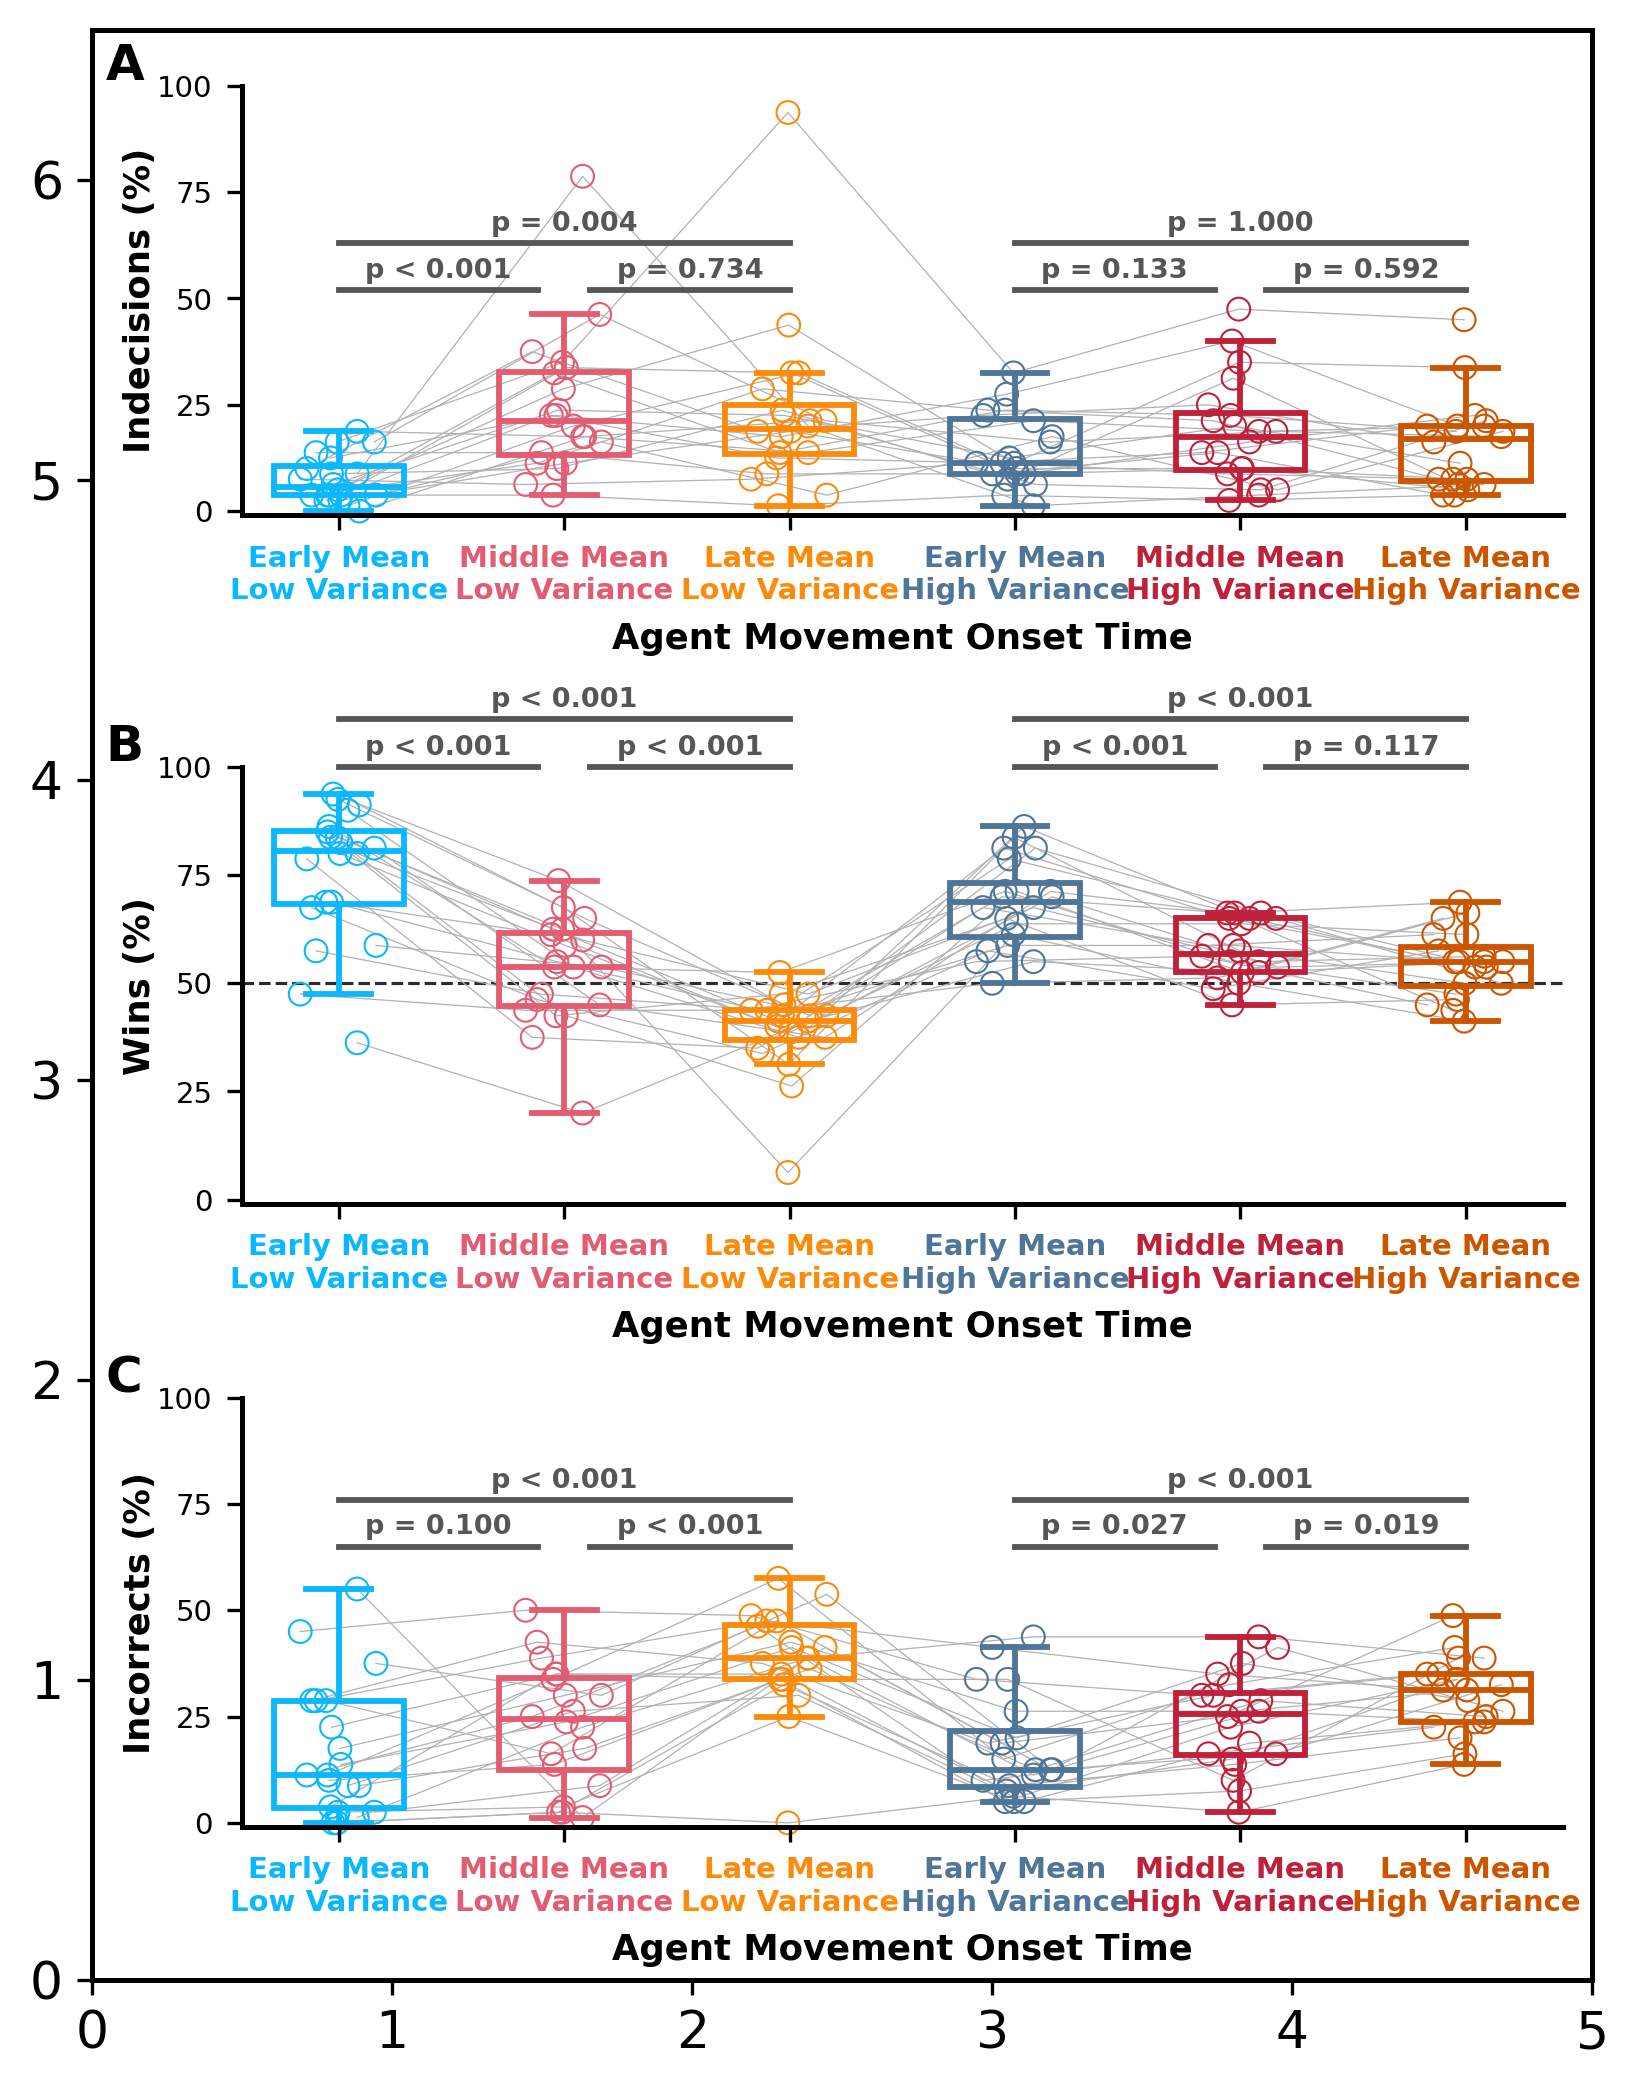

In [181]:

save_path = Path(
    r"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\figures"
)
w, h = 5, 6.5
bw = (0.3 * w) / it.num_blocks  # box widths of all boxes combined takes up 30% of the width
div_w = 2.3
xlocs = np.linspace(0, w / div_w, num=len(it.trial_block_titles))
legend_fontsize = 5.5
ticklabel_fontsize = 7
suptitle_fontsize = 6
label_fontsize = 8.5
markersize = 30

ylabelpad = 0

metrics = np.array(
    [
        participant_perc_indecisions,
        participant_perc_wins,
        participant_perc_incorrects,
    ]
)[:, :, [0, 2, 4, 1, 3, 5]]  # Rearranging axes to get the order I want
ylocs = ( [np.arange(0, 101, 25)] * 3)
ylabels = [
    "Indecisions (%)",
    "Wins (%)",
    # r"$\mathbf{\hat\theta}$",
    "Incorrects (%)",
]
ylims = [(-1, 100)] * 3
#* Stat inset thangs
stat_heights = [1.5,1.5,1.5]
low = False
if low == True:
    stat_ypos = [
                [50,50,61,50,50,61],
                [11,11,1,31,31,21],
                [65,65,77,65,65,77],
                ]
else:
    stat_ypos = [
                [52,52,63,52,52,63],
                [100,100,111,100,100,111],
                [65,65,76,65,65,76],
                ]
    
model_labels = ["Base Model", "Optimal Model", "Suboptimal Model"]
# save_names = ["exp1_results_only_optimal_model", 'exp1_results_both_models','exp1_results_statistics',]
suptitles = ["Model Results", "Model Results", "Participant Behaviour"]
legend_locs = (0.58, 0.86)
mosaic = "a;b;c"
fig = pf.NewFigure(mosaic, dpi=300, figsize=(w, h),wspace=None, hspace=None)
axs = list(fig.axes.values())
model_colors = [wheel.grey, wheel.dark_grey, wheel.black]
figure_pvals = [exp1_pvals_df.query("Metric == 'Indecisions'"),
                exp1_pvals_df.query("Metric == 'Wins'"),
                exp1_pvals_df.query("Metric == 'Incorrects'"), 
                ]
figure_cles = [exp1_cles_df.query("Metric == 'Indecisions'"),
               exp1_cles_df.query("Metric == 'Wins'"),
               exp1_cles_df.query("Metric == 'Incorrects'"), 
            ]

# * Looping axes for each metric
for i, ax in enumerate(axs):
    # * Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4,
            box_width = bw,
        )
    np.random.seed(3)
    dv.jitter_array(ax=ax,x_positions=xlocs,data=metrics[i,:,:].T,
                    data_color = constants.xticklabel_colors_means,
                    data_edge_color = wheel.lighten_color(wheel.light_grey,1.0),
                    noise_scale=0.04, include_mean = False, circle_size=markersize)

    if i == 1:
        ax.axhline(50, color=wheel.lighten_color(wheel.dark_grey,1.5), ls='--', zorder=-100, lw=0.75)
    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 0.75*bw, max(xlocs) + 0.75*bw)
    ax.set_xticks(xlocs, labels=constants.xticklabels, fontsize=ticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize, labelpad=ylabelpad)
    # dv.legend(ax, labels=model_labels, colors=model_colors,fontsize=legend_fontsize)
    [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    pf.plot_stats_v2(
            ax,
            pvals=figure_pvals[i],
            cles = figure_cles[i],
            combos = ['02','24','04',
                      '13','35','15'], #! 02, 24, 04 correspond to 1000;50, 1100;50, 1200;50
            xlocs = [
                [xlocs[0], xlocs[1]-0.05], 
                [xlocs[1]+0.05, xlocs[2]],
                [xlocs[0], xlocs[2]],
                [xlocs[3], xlocs[4]-0.05],
                [xlocs[4]+0.05, xlocs[5]],
                [xlocs[3], xlocs[5]],
            ],
            ypos=stat_ypos[i],
            stacked=True,
            show_effectsize=False,
            lw = 1.4, 
            h = stat_heights[i],
            fontsize=6.5,
            shorten_length=True,
            color = wheel.lighten_color(wheel.dark_grey,1.2),
        )
fig.add_all_letters(verticalshift=0.15, horizontalshift=-0.4)
# fig.pad_fig(w_pad=-2,h_pad=0,w_space=-2,h_space=0.1)
# Reduce spacing between plots maek them all a bit wider
shift = -0.05 
for ax_label in ["b",]:
    fig.adjust_position(fig.axes[ax_label], (0,shift)) # Shift the b and d plots to the left a bit
    fig.adjust_size(fig.axes[ax_label], (0,abs(shift)/2)) # Make the figures all a bit wider
# plt.subplots_adjust(right=0.8)
# plt.subplot_tool()
# fig.axmain.patch.set_facecolor('white')
plt.show()
fig.savefig(SAVE_PATH / "exp1_score_metrics_panel.png",transparent=True)

### Full Panel w/ inset

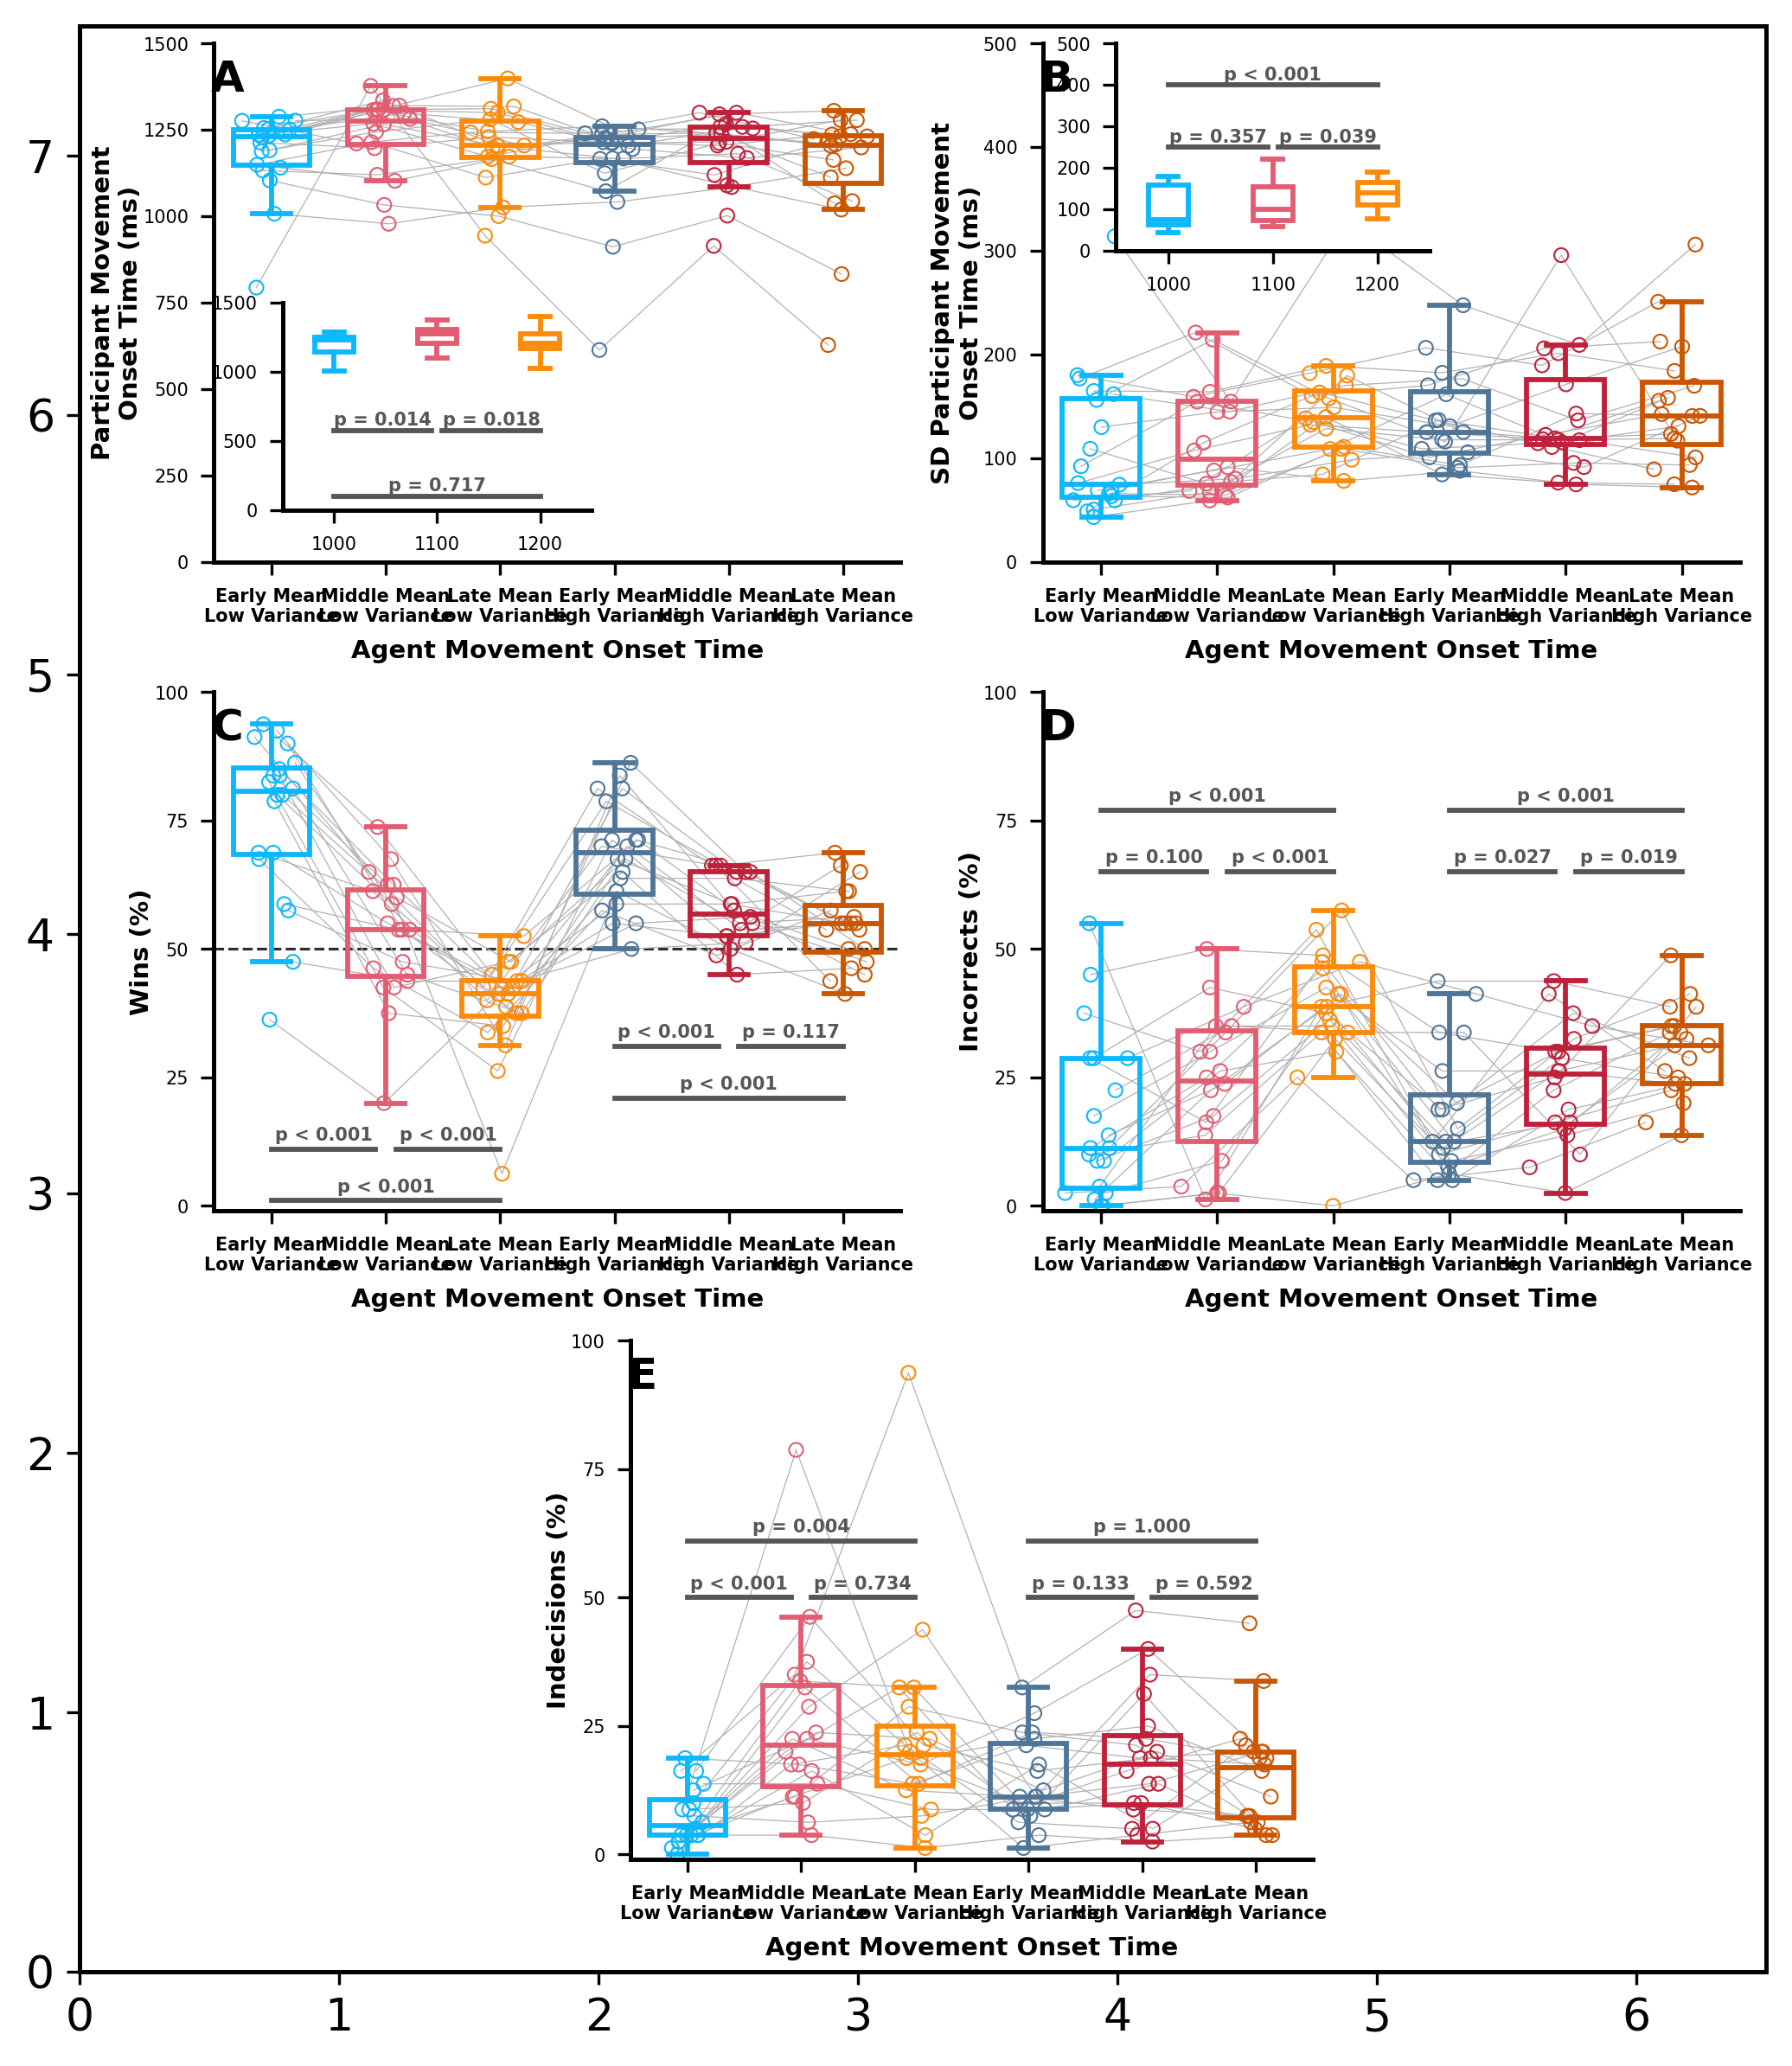

In [182]:

save_path = Path(
    r"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\figures"
)
w, h = 6.5, 7.5
bw = (0.35 * w) / it.num_blocks  # box widths of all boxes combined takes up 30% of the width
div_w = 2.3
xlocs = np.linspace(0, w / div_w, num=len(it.trial_block_titles))
legend_fontsize = 4.5
ticklabel_fontsize = 5
suptitle_fontsize = 6
label_fontsize = 7
markersize = 15

ylabelpad = 0

metrics = np.array(
    [
        participant_median_movement_onset_time,
        participant_sd_movement_onset_time,
        participant_perc_wins,
        participant_perc_incorrects,
        participant_perc_indecisions,
    ]
)[:, :, [0, 2, 4, 1, 3, 5]]  # Rearranging axes to get the order I want
ylocs = (
    [np.arange(0, 1501, 250)] + [np.arange(0, 501, 100)] + [np.arange(0, 101, 25)] * 3
)
ylabels = [
    "Participant Movement\nOnset Time (ms)",
    "SD Participant Movement\nOnset Time (ms)",
    "Wins (%)",
    # r"$\mathbf{\hat\theta}$",
    "Incorrects (%)",
    "Indecisions (%)",
]
ylims = [(0, 1500)] + [(0, 500)] + [(-1, 100)] * 3
#* Stat inset thangs
stat_heights = [16,3,1,1,1]
stat_ypos = [[575,575,100,], [250,250,400,],
             [11,11,1,31,31,21],
             [65,65,77,65,65,77],
             [50,50,61,50,50,61],
             ]
inset_ax_pos = [(0.1, 0.1, 0.45, 0.4),
                (0.105, 0.6, 0.45, 0.4)]
inset_xlims = [(0,1500),(0,500)]
inset_xlocs = np.linspace(1.5,3.5,num=3)
inset_ylocs = [np.arange(0,1501,500), np.arange(0,501,100)]
inset_ylims = [(0,1500), (0,500)]

model_labels = ["Base Model", "Optimal Model", "Suboptimal Model"]
# save_names = ["exp1_results_only_optimal_model", 'exp1_results_both_models','exp1_results_statistics',]
suptitles = ["Model Results", "Model Results", "Participant Behaviour"]
legend_locs = (0.58, 0.86)
mosaic = "aabb;ccdd;.ee."
fig = pf.NewFigure(mosaic, dpi=300, figsize=(w, h),wspace=None, hspace=None)
axs = list(fig.axes.values())
model_colors = [wheel.grey, wheel.dark_grey, wheel.black]
figure_pvals = [exp1_pvals_df.query("Metric == 'Median_Movement_Onset_Time'"),
                exp1_pvals_df.query("Metric == 'SD_Movement_Onset_Time'"),
                exp1_pvals_df.query("Metric == 'Wins'"),
                exp1_pvals_df.query("Metric == 'Incorrects'"), 
                exp1_pvals_df.query("Metric == 'Indecisions'")
                ]
figure_cles = [exp1_cles_df.query("Metric == 'Median_Movement_Onset_Time'"),
                exp1_cles_df.query("Metric == 'SD_Movement_Onset_Time'"),
                exp1_cles_df.query("Metric == 'Wins'"),
                exp1_cles_df.query("Metric == 'Incorrects'"), 
                exp1_cles_df.query("Metric == 'Indecisions'")
                ]

# * Looping axes for each metric
for i, ax in enumerate(axs):
    # * Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4,
            box_width = bw,
        )

    dv.jitter_array(ax=ax,x_positions=xlocs,data=metrics[i,:,:].T,
                    data_color = constants.xticklabel_colors_means,
                    data_edge_color = wheel.lighten_color(wheel.light_grey,1.0),
                    noise_scale=0.06, include_mean = False, circle_size=markersize)

    if i == 2:
        ax.axhline(50, color=wheel.lighten_color(wheel.dark_grey,1.5), ls='--', zorder=-100, lw=0.75)
    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 0.75*bw, max(xlocs) + 0.75*bw)
    ax.set_xticks(xlocs, labels=constants.xticklabels, fontsize=ticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize, labelpad=ylabelpad)
    # dv.legend(ax, labels=model_labels, colors=model_colors,fontsize=legend_fontsize)
    # [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    if i<2:
        inset_ax = ax.inset_axes(inset_ax_pos[i], zorder=99)
        for j in range(len(inset_xlocs)):
            dv.boxplot(
                inset_ax,
                inset_xlocs[j],
                metrics[i, :, j],
                color=constants.xticklabel_colors_means[j],
                data_color=constants.xticklabel_colors_means[j],
                box_lw=1.4, 
                box_width = bw,
            )
        pf.plot_stats_v2(
            inset_ax,
            pvals=figure_pvals[i],
            cles = figure_cles[i],
            combos = ['01','12','02',],
            xlocs = [[inset_xlocs[0],inset_xlocs[1]-0.05], 
                        [inset_xlocs[1]+0.05, inset_xlocs[2]],
                        [inset_xlocs[0],inset_xlocs[2]]],
            ypos=stat_ypos[i],
            stacked=True,
            show_effectsize=False,
            lw = 1.4, 
            h = stat_heights[i],
            fontsize=5,
            shorten_length=True,
            color = wheel.lighten_color(wheel.dark_grey,1.2),
        )
        inset_ax.set_xticks(inset_xlocs, labels=["1000", "1100", "1200"], fontsize=5)
        inset_ax.set_yticks(inset_ylocs[i], labels = inset_ylocs[i], fontsize=5)
        inset_ax.set_xlim(1.0,4)
        inset_ax.set_ylim(inset_ylims[i])
        if i==1:
            inset_ax.patch.set_facecolor(color='white')
            inset_ax.patch.set_alpha(1)
    else:
        pf.plot_stats_v2(
            ax,
            pvals=figure_pvals[i],
            cles = figure_cles[i],
            combos = ['02','24','04',
                      '13','35','15'], #! 02, 24, 04 correspond to 1000;50, 1100;50, 1200;50
            xlocs = [
                [xlocs[0], xlocs[1]-0.05], 
                [xlocs[1]+0.05, xlocs[2]],
                [xlocs[0], xlocs[2]],
                [xlocs[3], xlocs[4]-0.05],
                [xlocs[4]+0.05, xlocs[5]],
                [xlocs[3], xlocs[5]],
            ],
            ypos=stat_ypos[i],
            stacked=True,
            show_effectsize=False,
            lw = 1.4, 
            h = stat_heights[i],
            fontsize=5,
            shorten_length=True,
            color = wheel.lighten_color(wheel.dark_grey,1.2),
        )
    
fig.add_all_letters(verticalshift=-0.05, horizontalshift=-0.01)
# fig.pad_fig(w_pad=-2,h_pad=0,w_space=-2,h_space=0.1)
# Reduce spacing between plots maek them all a bit wider
shift = -0.14
for ax_label in ["a","b","c", "d"]:
    if ax_label in ["b","d"]:
        fig.adjust_position(fig.axes[ax_label], (shift, 0)) # Shift the b and d plots to the left a bit
    fig.adjust_size(fig.axes[ax_label], (abs(shift), 0)) # Make the figures all a bit wider
# plt.subplots_adjust(right=0.8)
# plt.subplot_tool()
# fig.axmain.patch.set_facecolor('white')
plt.show()
fig.savefig(SAVE_PATH / "exp1_data_panel.png",transparent=True)

# Model Figures

## Load Models

In [183]:
BOOTSTRAPPED_MODELS = True
if BOOTSTRAPPED_MODELS:
    p = "bootstrapped"
else:
    p = "warmstart"
    
path = constants.MODELS_PATH / f"{p}_models"
model_names = ["Base","Optimal","Suboptimal_All"]#, "Suboptimal Partial"]
model_results = []
model_inputs = []
for model in model_names:
    results_path = list(path.glob(f"{EXPERIMENT}_{model.lower()}_{p}_results*"))[-1]
    inputs_path = list(path.glob(f"{EXPERIMENT}_{model.lower()}_{p}_inputs*"))[-1]
    print(results_path)
    print(inputs_path)
    temp_results = pd.read_pickle(path / results_path)
    try:
        temp_results['num_parameters'] = 7 + temp_results["fit_parameters"].apply(len) # Add on number of parameters
    except KeyError:
        temp_results['num_parameters'] = 7
        
    # temp_results['bic'] = 30*np.log(temp_results['Loss']/30) + temp_results['num_parameters']*np.log(30)
    temp_results['bic'] = temp_results['num_parameters']*np.log(30) + 2*np.log(temp_results['Loss'])
    temp_results['aic'] = 2*temp_results['num_parameters'] + 2*np.log(temp_results['Loss'])
    temp_inputs = pd.read_pickle(path / inputs_path)
    model_results.append(temp_results)
    model_inputs.append(temp_inputs)
    
    
col_names = ["median_movement_onset_time", "sd_movement_onset_time",
              "wins", "incorrects","indecisions",]
base_medians = {}
base_intervals = {}
optimal_medians = {}
optimal_intervals = {}
suboptimal_medians = {}
suboptimal_intervals = {}
for i,col_name in enumerate(col_names):
    base_arr = np.stack(model_results[0][col_name].to_numpy())
    optimal_arr = np.stack(model_results[1][col_name].to_numpy())
    suboptimal_arr = np.stack(model_results[2][col_name].to_numpy())
    base_medians.update({col_name:np.median(base_arr,axis=0)[[0,2,4,1,3,5]]})
    base_intervals.update({col_name:np.percentile(base_arr,[5,95],axis=0)[:,[0,2,4,1,3,5]]})     
    optimal_medians.update({col_name:np.median(optimal_arr,axis=0)[[0,2,4,1,3,5]]})
    optimal_intervals.update({col_name:np.percentile(optimal_arr,[5,95],axis=0)[:,[0,2,4,1,3,5]]})     
    suboptimal_medians.update({col_name:np.median(suboptimal_arr,axis=0)[[0,2,4,1,3,5]]})
    suboptimal_intervals.update({col_name:np.percentile(suboptimal_arr,[5,95],axis=0)[:,[0,2,4,1,3,5]]})     
    
median_dicts = [base_medians, optimal_medians, suboptimal_medians]
interval_dicts = [base_intervals, optimal_intervals, suboptimal_intervals]
    
    

d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_base_bootstrapped_results_2023_12_06_06_38_57_new_new.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_base_bootstrapped_inputs_2023_12_06_06_38_57.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_optimal_bootstrapped_results_2023_12_06_06_38_57_new_new.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_optimal_bootstrapped_inputs_2023_12_06_06_38_57.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\bootstrapped_models\Exp1_suboptimal_all_bootstrapped_results_2023_12_11_21_37_53_new_new.pkl
d:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\models\boots

In [184]:
model_df.head()

,Model,Loss,fit_parameters,decision_times,target_reach_times,target_reach_times_sd,target_reach_times_guess,target_reach_times_guess_sd,target_reach_times_react,target_reach_times_react_sd,prob_selecting_guess,prob_selecting_reaction,median_movement_onset_time,sd_movement_onset_time,indecisions,wins,incorrects,num_parameters,bic,aic
0,suboptimal_all_model0_2023_12_07_16_20_14,2.628123,"[guess_switch_delay_true, guess_switch_delay_e...","[[1359.0, 1078.0, 0.0, 1023.0, 0.0, 897.0], [1...","[1377.4649961061616, 1324.633193343187, 1373.5...","[93.3900923135913, 139.05274799405834, 131.239...","[1299.271710080825, 1300.271710080825, 1308.27...","[[168.40556087862822, 168.40556087862822, 168....","[1404.7251744731673, 1338.3752657991529, 1488....","[67.23778234794023, 122.4951157225718, 65.9165...","[0.25850434145609014, 0.36065065836771326, 0.6...","[0.74149565854391, 0.6393493416322867, 0.36262...","[1204.5149961061616, 1151.683193343187, 1200.6...","[88.07130475126718, 136.03265923775052, 127.34...","[12.031292495731336, 14.827135308644268, 24.13...","[76.55113415809447, 69.42092319912973, 48.0601...","[11.417573346174189, 15.75194149222601, 27.806...",18,63.154093,37.932540
1,suboptimal_all_model1_2023_12_07_16_20_57,1.876205,"[guess_switch_delay_true, guess_switch_delay_e...","[[1387.0, 1072.0, 49.0, 1018.0, 29.0, 923.0], ...","[1389.5263809222758, 1339.5492219027678, 1403....","[83.69905586996572, 130.9108215202913, 111.972...","[1330.6852333716945, 1331.6852333716945, 1340....","[[145.96165729943053, 145.96165729943053, 145....","[1406.181608094654, 1343.5085221955585, 1491.1...","[66.07537220099003, 123.33314280526938, 64.718...","[0.22060962838938836, 0.3348730079907456, 0.58...","[0.7793903716106118, 0.6651269920092544, 0.418...","[1217.3263809222758, 1167.3492219027678, 1231....","[78.45742503855749, 127.97414062638467, 107.89...","[12.306340561700933, 15.862397594334851, 27.05...","[78.02020803878811, 69.6211882243216, 47.86666...","[9.67345139951095, 14.516414181343542, 25.0823...",18,62.480055,37.258502
2,suboptimal_all_model2_2023_12_07_16_21_32,2.692674,"[guess_switch_delay_true, guess_switch_delay_e...","[[1365.0, 1082.0, 1052.0, 1039.0, 139.0, 964.0...","[1379.2351365741956, 1328.651257860084, 1393.7...","[80.42924373021474, 125.79786078929986, 105.08...","[1324.9209654438087, 1325.9209654438087, 1335....","[[133.1528892130231, 133.1528892130231, 133.15...","[1393.9762764132836, 1330.0365201104698, 1477....","[66.11978056961884, 122.06615675453581, 64.515...","[0.21346858962960957, 0.33659187219831155, 0.5...","[0.7865314103703904, 0.6634081278016885, 0.408...","[1219.6601365741956, 1169.0762578600838, 1234....","[75.86840964645705, 123.17512730205317, 101.47...","[9.445061868111242, 13.367109972812019, 22.203...","[80.88776143349553, 71.56068320069987, 51.4624...","[9.66717669839322, 15.072206826488113, 26.3339...",18,63.202623,37.981070
3,suboptimal_all_model3_2023_12_07_16_22_07,2.304627,"[guess_switch_delay_true, guess_switch_delay_e...","[[1358.0, 1059.0, 102.0, 1010.0, 84.0, 926.0],...","[1398.9200388239822, 1349.0033573662768, 1415....","[81.34547742419468, 128.65456250647443, 106.37...","[1336.7535524343787, 1338.7535524343787, 1348....","[[139.05262946890963, 139.05262946890963, 139....","[1415.4102628362978, 1353.9607288476793, 1500....","[66.03813226773337, 123.625483322648, 64.66154...","[0.20964802529948415, 0.32598895065534217, 0.5...","[0.7903519747005158, 0.6740110493446578, 0.439...","[1227.670038823982, 1177.7533573662768, 1244.3...","[75.86029915299329, 125.58006927435473, 102.00...","[14.204610276777313, 17.023732489156927, 29.91...","[76.57296724068617, 68.82364266885294, 45.9296...","[9.222422482536544, 14.15262484199013, 24.1568...",18,62.891391,37.669838
4,suboptimal_all_model4_2023_12_07_16_22_42,2.781424,"[guess_switch_delay_true, guess_switch_delay_e...","[[1321.0, 1075.0, 1028.0, 1027.0, 91.0, 932.0]...","[1389.999861826034, 1341.9611390269413, 1414.8...","[78.0960666712194, 125.75607199

## Model Distribution of Target Reach Times

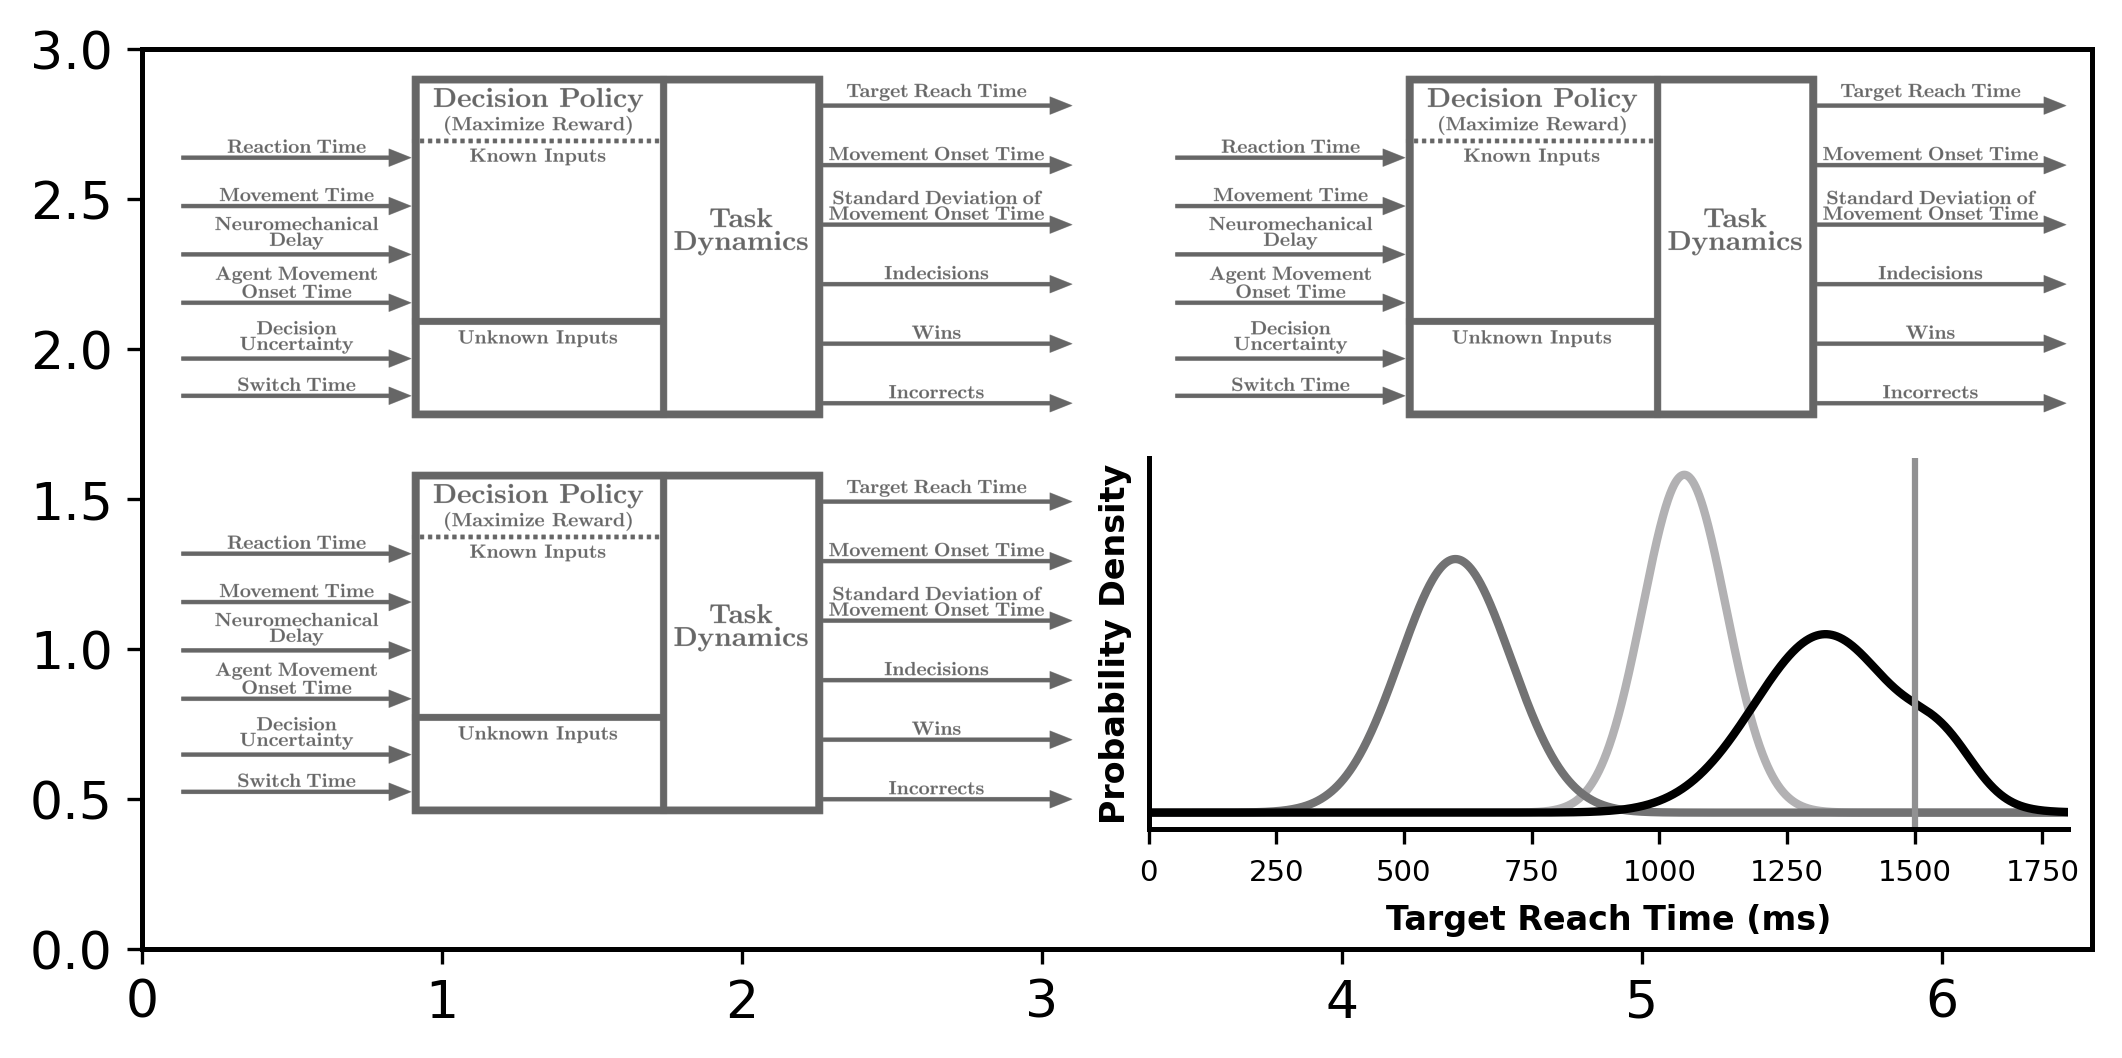

In [204]:
#
# * List of lists, react goes first on the inner list
# * Outer list is for each model
median_target_reach_times = []
sd_target_reach_times = []
prob_selecting = []

for i,model_df in enumerate(model_results):
    reaction_reach_time = np.nanmedian(np.stack(model_df["target_reach_times_react"].to_numpy()),axis=0)
    guess_reach_time = np.nanmedian(np.stack(model_df["target_reach_times_guess"].to_numpy()),axis=0)
    median_target_reach_times.append([reaction_reach_time, guess_reach_time])
    
    reaction_reach_time_sd = np.nanmedian(np.stack(model_df["target_reach_times_react_sd"].to_numpy()),axis=0)
    guess_reach_time_sd = np.nanmedian(np.stack(model_df["target_reach_times_guess_sd"].to_numpy()),axis=0)
    sd_target_reach_times.append([reaction_reach_time_sd, guess_reach_time_sd])
    
    prob_selecting_react = np.nanmedian(np.stack(model_df["prob_selecting_reaction"].to_numpy()),axis=0)
    prob_selecting_guess = np.nanmedian(np.stack(model_df["prob_selecting_guess"].to_numpy()),axis=0)
    prob_selecting.append([prob_selecting_react, prob_selecting_guess])
    
    

fig = pf.NewFigure("ab;cd",figsize=(6.5,3), dpi=300)

model_titles = {'a':"Optimal Model (No Switch Time)",
                "b":"Optimal Model (With Switch Time)",
                "c":"Suboptimal Model (With Switch Time)"}
for name,ax in fig.axes.items():
    if name in ['a','b','c']:
        # ax.set_title(model_titles[name],fontsize=10)
        ax.imshow(mpimg.imread(SAVE_PATH / "new_model.png"), aspect='auto')
        # img = np.asarray(Image.open(SAVE_PATH / "new_model.png"))
        # ax.imshow(img, aspect='auto')
        ax.set_axis_off()
        ax.set_xticklabels([])
        ax.set_yticklabels([])

condition = 4 # 1200,50 condition
for i,(median,sd) in enumerate(zip(median_target_reach_times,sd_target_reach_times)):
    xvals = np.arange(0,1800)
    norm_react = stats.norm.pdf(xvals, median[0][condition], sd[0][condition])*prob_selecting[i][0][condition]
    norm_guess = stats.norm.pdf(xvals, median[1][condition], sd[1][0][condition])*prob_selecting[i][1][condition]
    
    # fig.axes['d'].plot(xvals,norm_react, c=constants.model_colors[i], ls='--')
    fig.axes['d'].plot(xvals,norm_guess+norm_react, c=constants.model_colors[i],lw=2)
    fig.axes['d'].set_xlim(0,1800)
    
fig.axes['d'].axvline(1500, color=wheel.grey)
xticks = np.arange(0,1751,250)
fig.axes['d'].set_xticks(xticks,labels=xticks, fontsize=7)
fig.axes['d'].set_xlabel("Target Reach Time (ms)", fontsize=8)
fig.axes['d'].set_yticks([])
fig.axes['d'].set_ylabel("Probability Density",fontsize=8)


plt.show()
fig.savefig(SAVE_PATH / "model_diagram.png")


In [ ]:
# Get the median median target reach time from the bootrapped model
# Get the median sd target reach time from the bootrstrapped model
# Make a normal distribution of each and highlight indecisions

In [ ]:
target_reach_time_medians = 

SyntaxError: invalid syntax (3136996992.py, line 1)

## Full Panel w/ Models

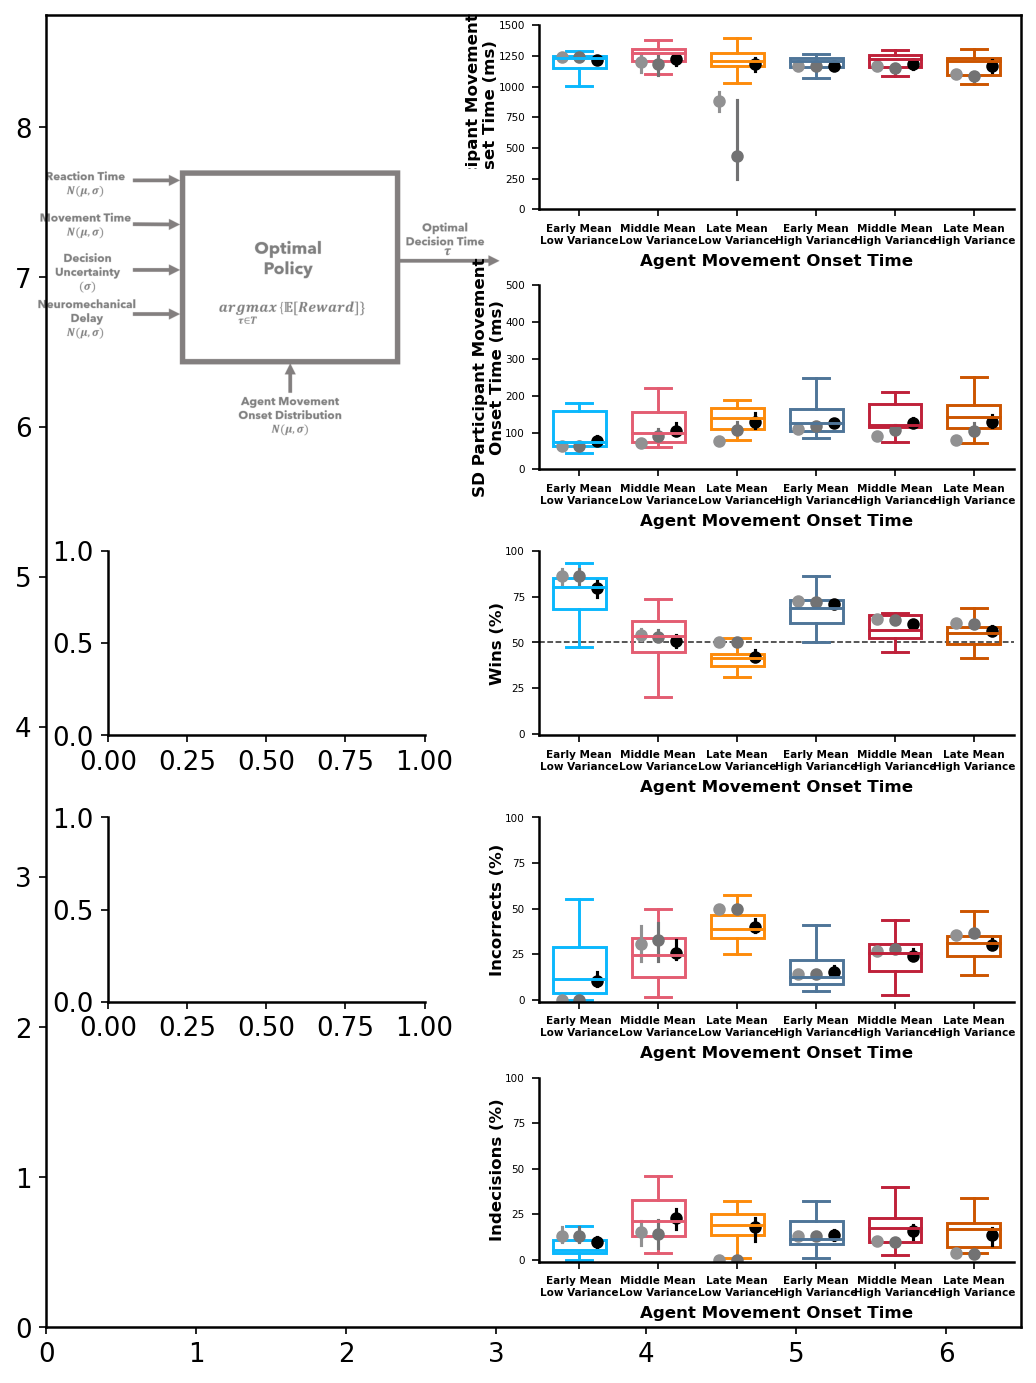

In [ ]:


save_path = Path(
    r"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\figures"
)
w, h = 6.5, 8.75
bw = (0.35 * w) / it.num_blocks  # box widths of all boxes combined takes up 30% of the width
div_w = 2.3
xlocs = np.linspace(0, w / div_w, num=len(it.trial_block_titles))
legend_fontsize = 6.5
ticklabel_fontsize = 5
suptitle_fontsize = 6
label_fontsize = 8
markersize = 15

ylabelpad = 0

metrics = np.array(
    [
        participant_median_movement_onset_time,
        participant_sd_movement_onset_time,
        participant_perc_wins,
        participant_perc_incorrects,
        participant_perc_indecisions,
    ]
)[:, :, [0, 2, 4, 1, 3, 5]]  # Rearranging axes to get the order I want
ylocs = (
    [np.arange(0, 1501, 250)] + [np.arange(0, 501, 100)] + [np.arange(0, 101, 25)] * 3
)
ylabels = [
    "Participant Movement\nOnset Time (ms)",
    "SD Participant Movement\nOnset Time (ms)",
    "Wins (%)",
    # r"$\mathbf{\hat\theta}$",
    "Incorrects (%)",
    "Indecisions (%)",
]
ylims = [(0, 1500)] + [(0, 500)] + [(-1, 100)] * 3
#* Stat inset thangs
stat_heights = [16,3,1,1,1]
stat_ypos = [[575,575,100,], [250,250,400,],
             [11,11,1,31,31,21],
             [65,65,77,65,65,77],
             [50,50,61,50,50,61],
             ]
inset_ax_pos = [(0.1, 0.1, 0.45, 0.4),
                (0.105, 0.6, 0.45, 0.4)]
inset_xlims = [(0,1500),(0,500)]
inset_xlocs = np.linspace(1.5,3.5,num=3)
inset_ylocs = [np.arange(0,1501,500), np.arange(0,501,100)]
inset_ylims = [(0,1500), (0,500)]

model_labels = ["Base Model", "Optimal Model", "Suboptimal Model"]
# save_names = ["exp1_results_only_optimal_model", 'exp1_results_both_models','exp1_results_statistics',]
suptitles = ["Model Results", "Model Results", "Participant Behaviour"]
legend_locs = (0.58, 0.86)
mosaic = [[".","d"],
          ["a","e"],
          ["b","f"],
          ["c","g"],
          [".","h"]]

fig = pf.NewFigure(mosaic, dpi=300, figsize=(w, h),wspace=None, hspace=None, width_ratios=[0.4,0.6])
axs = list(fig.axes.values())
model_colors = [wheel.grey, wheel.dark_grey, wheel.black]
figure_pvals = [exp1_pvals_df.query("Metric == 'Median_Movement_Onset_Time'"),
                exp1_pvals_df.query("Metric == 'SD_Movement_Onset_Time'"),
                exp1_pvals_df.query("Metric == 'Wins'"),
                exp1_pvals_df.query("Metric == 'Incorrects'"), 
                exp1_pvals_df.query("Metric == 'Indecisions'")
                ]
figure_cles = [exp1_cles_df.query("Metric == 'Median_Movement_Onset_Time'"),
                exp1_cles_df.query("Metric == 'SD_Movement_Onset_Time'"),
                exp1_cles_df.query("Metric == 'Wins'"),
                exp1_cles_df.query("Metric == 'Incorrects'"), 
                exp1_cles_df.query("Metric == 'Indecisions'")
                ]

# * Looping axes for each metric
data_figs = ["d","e","f","g","h"]
i = -1
for letter,ax in fig.axes.items():
    if letter not in data_figs:
        continue
    i+=1
    # * Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4,
            box_width = bw,
        )
        for k, (model_medians, model_intervals) in enumerate(
            zip(median_dicts, interval_dicts)
        ):
            if k == 0:
                shift = -bw / 3
            elif k == 2:
                shift = +bw / 3
            else:
                shift=0
            pf.plot_boostrapped_model_results(
                ax,
                xlocs[j] + shift,
                y=model_medians[col_names[i]][j],
                percentiles=model_intervals[col_names[i]][:, j],
                horizontal_lw=0,
                markersize=5,
                color=model_colors[k],
            )

    if i == 2:
        ax.axhline(50, color=wheel.lighten_color(wheel.dark_grey,1.5), ls='--', zorder=-100, lw=0.75)
        
    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 0.75*bw, max(xlocs) + 0.75*bw)
    ax.set_xticks(xlocs, labels=constants.xticklabels, fontsize=ticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize, labelpad=ylabelpad)
    # dv.legend(ax, labels=model_labels, colors=model_colors,fontsize=legend_fontsize)
    # [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    
#* Plot Models
fig.axes['a'].imshow(mpimg.imread(SAVE_PATH / "Base_Model.png"), aspect='equal')
fig.axes['a'].set_axis_off()
fig.adjust_size(fig.axes['a'],(1,1))
fig.adjust_position(fig.axes['a'],(-0.5,0))

# Reduce spacing between plots and maek them all a bit wider
# fig.add_all_letters(verticalshift=0.1, horizontalshift=-0.45)
# shift = -0.14
# for ax_label in ["a","b","c", "d"]:
#     if ax_label in ["b","d"]:
#         fig.adjust_position(fig.axes[ax_label], (shift, 0)) # Shift the b and d plots to the left a bit
#     fig.adjust_size(fig.axes[ax_label], (abs(shift), 0)) # Make the figures all a bit wider
plt.show()
fig.savefig(SAVE_PATH / "exp1_data_panel_with_models.png",transparent=True)

# 

In [ ]:
fig.axes

{'d': <Axes: label='d', xlabel='Agent Movement Onset Time', ylabel='Participant Movement\nOnset Time (ms)'>,
 'a': <Axes: label='a'>,
 'e': <Axes: label='e', xlabel='Agent Movement Onset Time', ylabel='SD Participant Movement\nOnset Time (ms)'>,
 'b': <Axes: label='b'>,
 'f': <Axes: label='f', xlabel='Agent Movement Onset Time', ylabel='Wins (%)'>,
 'c': <Axes: label='c'>,
 'g': <Axes: label='g', xlabel='Agent Movement Onset Time', ylabel='Incorrects (%)'>,
 'h': <Axes: label='h', xlabel='Agent Movement Onset Time', ylabel='Indecisions (%)'>}

In [ ]:
(3.14*4**2)/2

25.12